## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

**More information about Pandas converters:** [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.register_matplotlib_converters.html)

Register converters for handling timestamp values in plots.

*More infomration* about [Pandas Timestamp.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html?highlight=timestamp#pandas.Timestamp) The Pandas *timestamp* is equivalent to Python’s *Datetime* and is interchangeable with it in most cases

# Kaggle Bike Sharing Demand Dataset

**Download dataset from [Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)**

*Input Features*
```season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, dayofweek, hour```

*Target*
```count```

>*Objective:*
>Provided hourly rental data spanning two years.

>For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.

>You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period

Reference: https://www.kaggle.com/c/bike-sharing-demand/data

In [2]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

## Build the Data Frame

In [3]:
df = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0)
df_test = pd.read_csv('test.csv', parse_dates=['datetime'], index_col=0)

In [4]:
df.head() # data check

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Convert datetime to numeric values for training

In [5]:
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

### Add New Features

In [6]:
add_features(df) # take the previous function's build and apply to dataframe
add_features(df_test)

In [7]:
df.head() # data review showing 'year', 'month', 'day', 'dayofweek', 'hour'

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


### Next, Predict the Missing Data

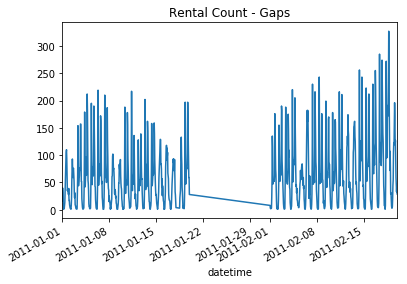

In [8]:
df['2011-01':'2011-02']['count'].plot() # grab Jan. and Feb. data
plt.title('Rental Count - Gaps')
plt.show()

The graph shows missing information near the end of the month.

### Rental Use Change on an Hourly Basis

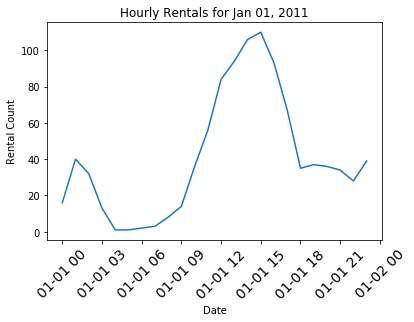

In [9]:
# For example: Jan. 1, 2011 day view
plt.plot(df['2011-01-01']['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Hourly Rentals for Jan 01, 2011')
plt.show()

### Rental View Monthly (Seasonly)

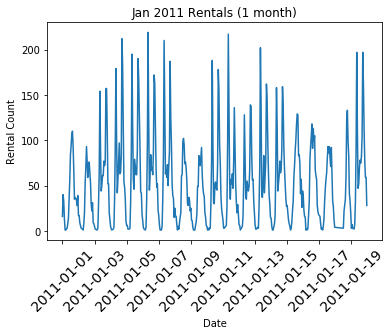

In [11]:
# Monthly
plt.plot(df['2011-01']['count'])
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Jan 2011 Rentals (1 month)')
plt.show()

**Notice:** The data ends at Jan. 19

### Grouping by Hour